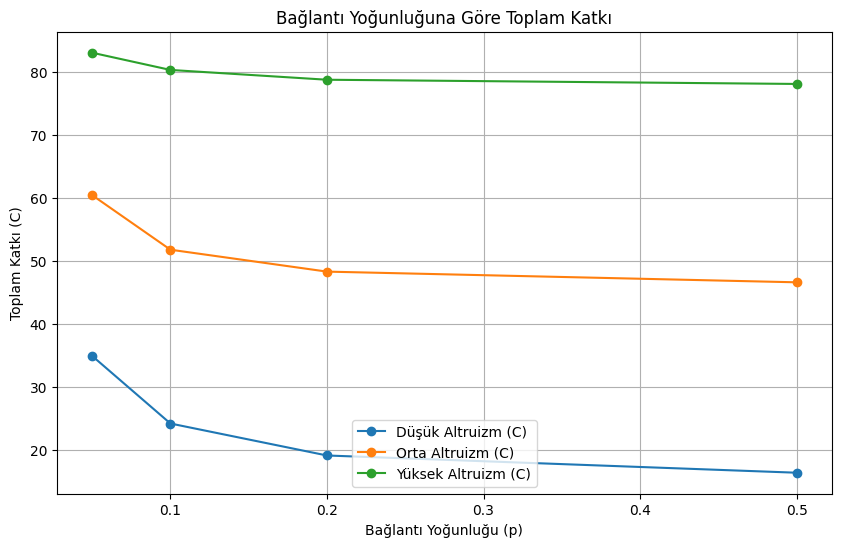

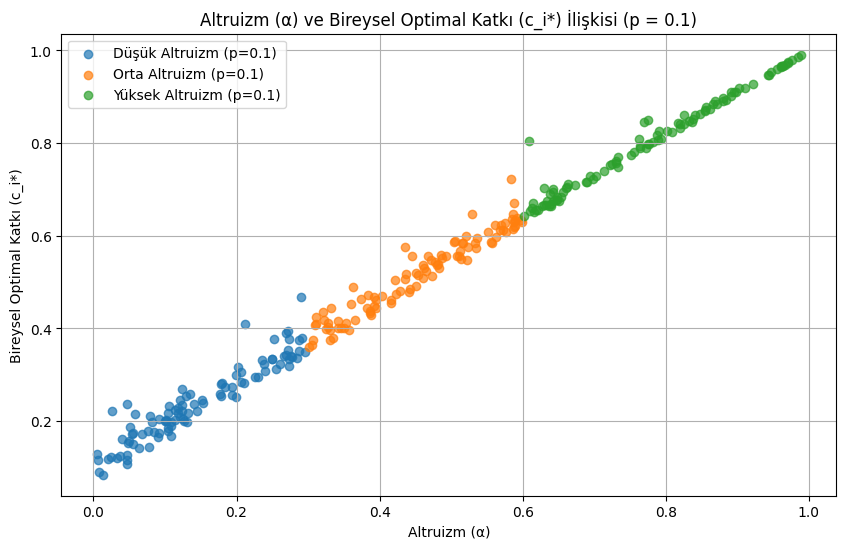

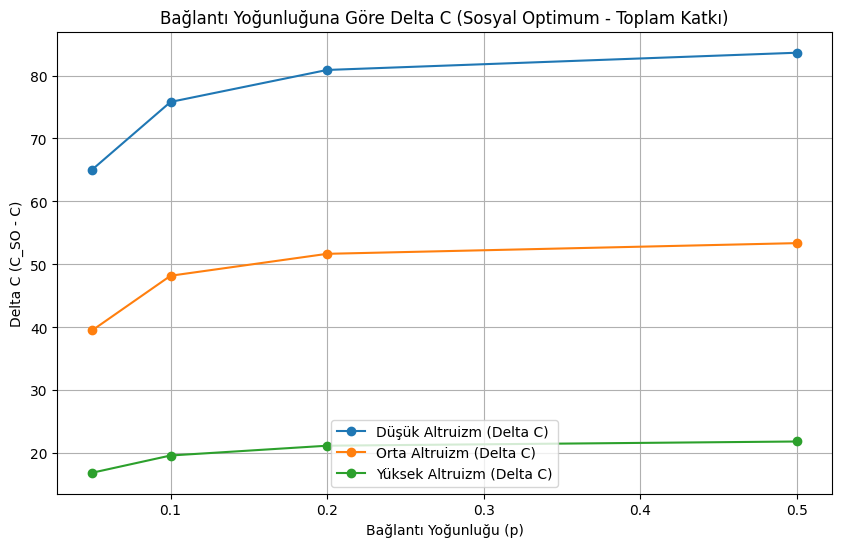

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Parametreler
N = 100  # Oyuncu sayısı
p_values = [0.05, 0.1, 0.2, 0.5]  # Bağlantı yoğunluğu değerleri
beta = 2  # Kamu malı çarpanı
theta = 2  # Maliyet fonksiyonu parametresi

# Altruizm senaryoları
altruism_scenarios = {
    "Düşük Altruizm": (0, 0.3),
    "Orta Altruizm": (0.3, 0.6),
    "Yüksek Altruizm": (0.6, 1.0),
}

# Simülasyon sonuçlarını saklama
results = []

# Altruizm senaryolarında döngü
for scenario_name, (alpha_min, alpha_max) in altruism_scenarios.items():
    alpha = np.random.uniform(alpha_min, alpha_max, size=N)  # Altruizm dağılımı

    for p in p_values:
        # Erdős-Rényi ağı oluştur
        G = nx.erdos_renyi_graph(N, p)

        # Bireysel optimal katkılar (c_i^*)
        c_optimal = np.zeros(N)
        for i in range(N):
            N_i = len(list(G.neighbors(i)))  # Komşu sayısı
            if N_i > 0:
                c_optimal[i] = (beta * (1 + alpha[i] * (N_i - 1)) / (theta * N_i)) ** (1 / (theta - 1))
            else:
                c_optimal[i] = 0

        # Sosyal optimum katkı
        c_social_optimal = (beta / theta) ** (1 / (theta - 1))
        C_social_optimal = N * c_social_optimal

        # Toplam bireysel katkı
        C_individual = np.sum(c_optimal)

        # Sonuçları sakla
        results.append({
            "scenario": scenario_name,
            "p": p,
            "C_individual": C_individual,
            "C_social_optimal": C_social_optimal,
            "delta_C": C_social_optimal - C_individual,
            "c_optimal": c_optimal,
            "alpha": alpha,
        })

# Görselleştirme
# 1. Bağlantı yoğunluğuna göre toplam katkı
plt.figure(figsize=(10, 6))
for scenario_name in altruism_scenarios.keys():
    scenario_results = [r for r in results if r["scenario"] == scenario_name]
    p_vals = [r["p"] for r in scenario_results]
    C_vals = [r["C_individual"] for r in scenario_results]
    plt.plot(p_vals, C_vals, marker='o', label=f"{scenario_name} (C)")

plt.title("Bağlantı Yoğunluğuna Göre Toplam Katkı")
plt.xlabel("Bağlantı Yoğunluğu (p)")
plt.ylabel("Toplam Katkı (C)")
plt.legend()
plt.grid()
plt.show()

# 2. Altruizm ve bireysel katkı ilişkisi
plt.figure(figsize=(10, 6))
for scenario_name in altruism_scenarios.keys():
    scenario_results = [r for r in results if r["scenario"] == scenario_name and r["p"] == 0.1]
    alpha_vals = scenario_results[0]["alpha"]
    c_optimal_vals = scenario_results[0]["c_optimal"]
    plt.scatter(alpha_vals, c_optimal_vals, label=f"{scenario_name} (p=0.1)", alpha=0.7)

plt.title("Altruizm (\u03B1) ve Bireysel Optimal Katkı (c_i*) İlişkisi (p = 0.1)")
plt.xlabel("Altruizm (\u03B1)")
plt.ylabel("Bireysel Optimal Katkı (c_i*)")
plt.legend()
plt.grid()
plt.show()

# 3. Delta C grafiği
plt.figure(figsize=(10, 6))
for scenario_name in altruism_scenarios.keys():
    scenario_results = [r for r in results if r["scenario"] == scenario_name]
    p_vals = [r["p"] for r in scenario_results]
    delta_C_vals = [r["delta_C"] for r in scenario_results]
    plt.plot(p_vals, delta_C_vals, marker='o', label=f"{scenario_name} (Delta C)")

plt.title("Bağlantı Yoğunluğuna Göre Delta C (Sosyal Optimum - Toplam Katkı)")
plt.xlabel("Bağlantı Yoğunluğu (p)")
plt.ylabel("Delta C (C_SO - C)")
plt.legend()
plt.grid()
plt.show()
